<a href="https://colab.research.google.com/github/Don4141/Machine-Learning-Examples/blob/main/Copy_of_Student_MLE_MiniProject_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Deep Learning with Keras

In this mini-project we'll be building a deep learning classifier using Keras to predict income from the popular [Adult Income dataset](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

Predicting income from demographic and socio-economic information is an important task with real-world applications, such as financial planning, market research, and social policy analysis. The Adult dataset, sometimes referred to as the "Census Income" dataset, contains a vast amount of anonymized data on individuals, including features such as age, education, marital status, occupation, and more. Our objective is to leverage this data to train a deep learning model that can effectively predict whether an individual's income exceeds $50,000 annually or not.

Throughout this Colab, we will walk you through the entire process of building a deep learning classifier using Keras, a high-level neural network API that runs on top of TensorFlow. Keras is known for its user-friendly and intuitive interface, making it an excellent choice for both beginners and experienced deep learning practitioners.

Here's a brief outline of what we will cover in this mini-project:

1. **Data Preprocessing:** We will start by loading and exploring the Adult dataset.

2. **Building the Deep Learning Model:** We will construct a neural network using Keras, where we'll dive into understanding the key components of a neural network, including layers, activation functions, and optimization algorithms.

3. **Model Training:** With our model architecture in place, we will split the data into training and validation sets and train the neural network on the training data. We will monitor the training process to prevent overfitting and enhance generalization.

4. **Model Evaluation:** After training, we'll assess the performance of our model on the test dataset.

By the end of this tutorial, you will not only have a functional deep learning classifier for income prediction but also gain valuable insights into how to leverage the power of neural networks for solving real-world classification tasks.


In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

You can download the Adult data from the link [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data).

Here are your tasks:

  1. Load the Adult data into a Pandas Dataframe.
  2. Ensure the dataset has properly named columns. If the columns are not read in, assign them by referencing the dataset documentation.
  3. Display the first five rows of the dataset.

In [ ]:
#Defining the appropriate column names and their data types
Dtype = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  # labeled fnlwgt in the original dataset
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])

In [ ]:
#Downloading the dataset and loading it into a pandas DataFrame
DATA_PATH = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df =  pd.read_csv(DATA_PATH, names=Dtype,
                  index_col=None, dtype=Dtype)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0,40,Cuba,<=50K


If you're not already familiar with the Adult dataset, it's important to do some exploratory data analysis.

Here are your tasks:

  1. Do exploratory data analysis to give you some better intuition for the dataset. This is a bit open-ended. How many rows/columns are there? How are NULL values represented? What's the percentage of positive cases in the dataset?

  2. Drop all rows with NULL values.

  3. Use Scikit-Learn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to convert the `income` column with a data type string to a binary variable.

In [ ]:
n_rows, n_col = df.shape
print("The number of rows in the dataset is", n_rows)
print("The number of columns in the dataset is", n_col)

The number of rows in the dataset is 32561
The number of columns in the dataset is 15


Let's detect how missing values are represented in each column by outputing  a list of the values representing missing data in each column along with their respective counts.

In [ ]:
def detect_missing_values_and_counts(df, missing_values=["?", ",", "N/A", "NaN", "null"]):
    missing_info = {}
    for col in df.columns:
        column_missing_counts = {}

        temp_col = df[col].astype(str)
        for value in missing_values:
            count = temp_col.apply(lambda x: x.strip() == value).sum()
            if count > 0:
                column_missing_counts[value] = count
        if column_missing_counts:
            missing_info[col] = column_missing_counts
    return missing_info

missing_info = detect_missing_values_and_counts(df)
print(missing_info)

{'workclass': {'?': 1836}, 'occupation': {'?': 1843}, 'native_country': {'?': 583}}


Let's replace all instances of "?" with NAN, but before then, we need to remove leading and trailing whitespaces around the "?" in the selected columns.

In [ ]:
columns_to_clean = ["workclass", "occupation", "native_country"]
df.loc[:, columns_to_clean] = df.loc[:, columns_to_clean].apply(lambda x: x.str.strip())
df.loc[:, columns_to_clean] = df.loc[:, columns_to_clean].replace("?", np.nan)

Let's be sure that we have successfully replaced "?" in the selected columns

In [ ]:
print(df[["workclass", "occupation", "native_country"]].apply(lambda x: x.str.contains("\?").sum()))

workclass         0
occupation        0
native_country    0
dtype: int64


There are 0.07% of duplicated rows in the dataset, and we have to remove them to avoid biasing the dataset and other issues that might be faced in the model building process.

In [ ]:
if (duplicated := df.duplicated(keep=False)).any():
    some_duplicates = df[duplicated].sort_values(by=df.columns.to_list()).head()
    print(f"Dataframe has one or more duplicated rows, for example:\n{some_duplicates}")

Dataframe has one or more duplicated rows, for example:
       age workclass  final_weight      education  education_num  \
17673   19   Private         97261        HS-grad              9   
18698   19   Private         97261        HS-grad              9   
6990    19   Private        138153   Some-college             10   
21318   19   Private        138153   Some-college             10   
15189   19   Private        146679   Some-college             10   

       marital_status       occupation    relationship    race      sex  \
17673   Never-married  Farming-fishing   Not-in-family   White     Male   
18698   Never-married  Farming-fishing   Not-in-family   White     Male   
6990    Never-married     Adm-clerical       Own-child   White   Female   
21318   Never-married     Adm-clerical       Own-child   White   Female   
15189   Never-married  Exec-managerial       Own-child   Black     Male   

       capital_gain  capital_loss  hours_per_week native_country income_class  
1767

In [ ]:
n_sample_before = df.shape[0]
n_sample_after= df.drop_duplicates().shape[0]
print("Percent duplicates removed: {:.2%}".format((n_sample_before - n_sample_after)/n_sample_before))

Percent duplicates removed: 0.07%


Let's drop duplicated rows and calculate the number of unique values in the individual columns as this will be useful in identifying how many different categories, types or ranges of values are present in each attribute.

In [ ]:
df = df.drop_duplicates()

In [ ]:
def unique_col_values(df):
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ["Total"]

    unique = []
    for col in df.columns:
        unique_val = df[col].nunique()
        unique.append(unique_val)

    temp["Unique"] = unique
    return(np.transpose(temp))

unique_col_values(df)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
Total,32537,30701,32537,32537,32537,32537,30694,32537,32537,32537,32537,32537,32537,31955,32537
Unique,73,8,21648,16,16,7,14,6,5,2,119,92,94,41,2


The dataset is imbalance as there are fewer non-missing entries in the workclass, occupation and native_country columns. Since we have enough data points for downstream analysis, let's drop all rows with missing values. In an ideal situation, we could consider placing these missing values in a different category, such as "other".

In [ ]:
modified_df = df.dropna(how="any")
unique_col_values(modified_df)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
Total,30139,30139,30139,30139,30139,30139,30139,30139,30139,30139,30139,30139,30139,30139,30139
Unique,72,7,20263,16,16,7,14,6,5,2,118,90,94,41,2


Looking at the statistical summary of the numeric variables in the dataset, the capital_gain and capital_loss variables are highly skewed with extreme variability among the data points. Their minimum values are 0, and their maximum values are 99,999 and 4,356, respectively. These values need further investigation as they may represent potential outliers. The final_weight variable is also highly skewed, with a range from 13,769 to 1,484,705, which is very large. These extreme values need to be investigated as they appear to be potential outliers. The hours_per_week data points are mostly centered around a typical work week, with some outliers at both ends. The minimum value of 1 hour and the maximum of 99 hours might represent part-time and overworked individuals. However, in numeric variables, missing values are sometimes coded as 99,999, 99, or 9. Therefore, these variables need to be thoroughly investigated to avoid any potential hurdles during the model-building step.

In [ ]:
num_df = modified_df.select_dtypes(include=["int", "float"])
num_df.describe().style.background_gradient(cmap="Blues")

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,189795.025980,10.122532,1092.841202,88.439928,40.934703
std,13.131426,105658.624341,2.548738,7409.110596,404.445239,11.978753
min,17.000000,13769.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117627.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178417.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,237604.500000,13.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


Let's look into the potential outliers in final weight and capital gain and capital loss. From the boxplot of the three variables, it appears that the extreme value in capital gain is a potential outlier but that of the capital loss is not an outlier. Also, apart from the extreme value in final weight (red pont) which appears as a potential outlier, there are other values in the variable which can be considered as potential outliers.

In [ ]:
subset_df = modified_df.loc[(modified_df["final_weight"] > 189795) & \
            (modified_df["capital_gain"] > 1092) | (modified_df["capital_loss"] > 88)]


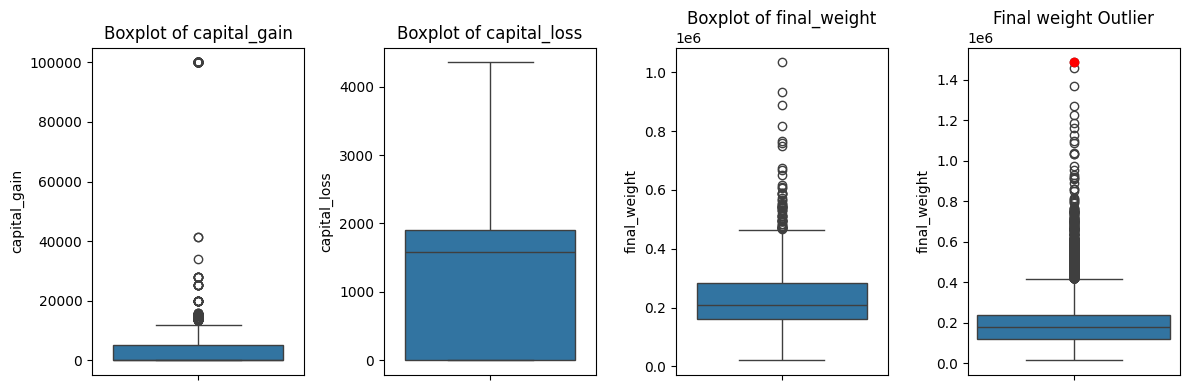

In [ ]:
columns_to_plot = ['capital_gain', 'capital_loss', 'final_weight']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=subset_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

outlier_final_weight = modified_df.loc[modified_df["final_weight"] == 1484705]
sns.boxplot(y=modified_df["final_weight"], ax=axes[3])
axes[3].scatter(0, outlier_final_weight["final_weight"], color='red', label='Outlier', zorder=10)
axes[3].set_title("Final weight Outlier")
axes[3].set_xlabel('')
axes[3].set_ylabel("final_weight")

plt.tight_layout()
plt.show()

Does the numerical variables appear to have any relationship? Let's create a scatter plots for each pair of the numerical variables using Seaborn. This will help us to identify identify correlations or patterns that exist between the variables. We will sample the dataset using the sample method in Pandas. From the scatter plot below, it appears there's no discernible correlation between the numeric variables.

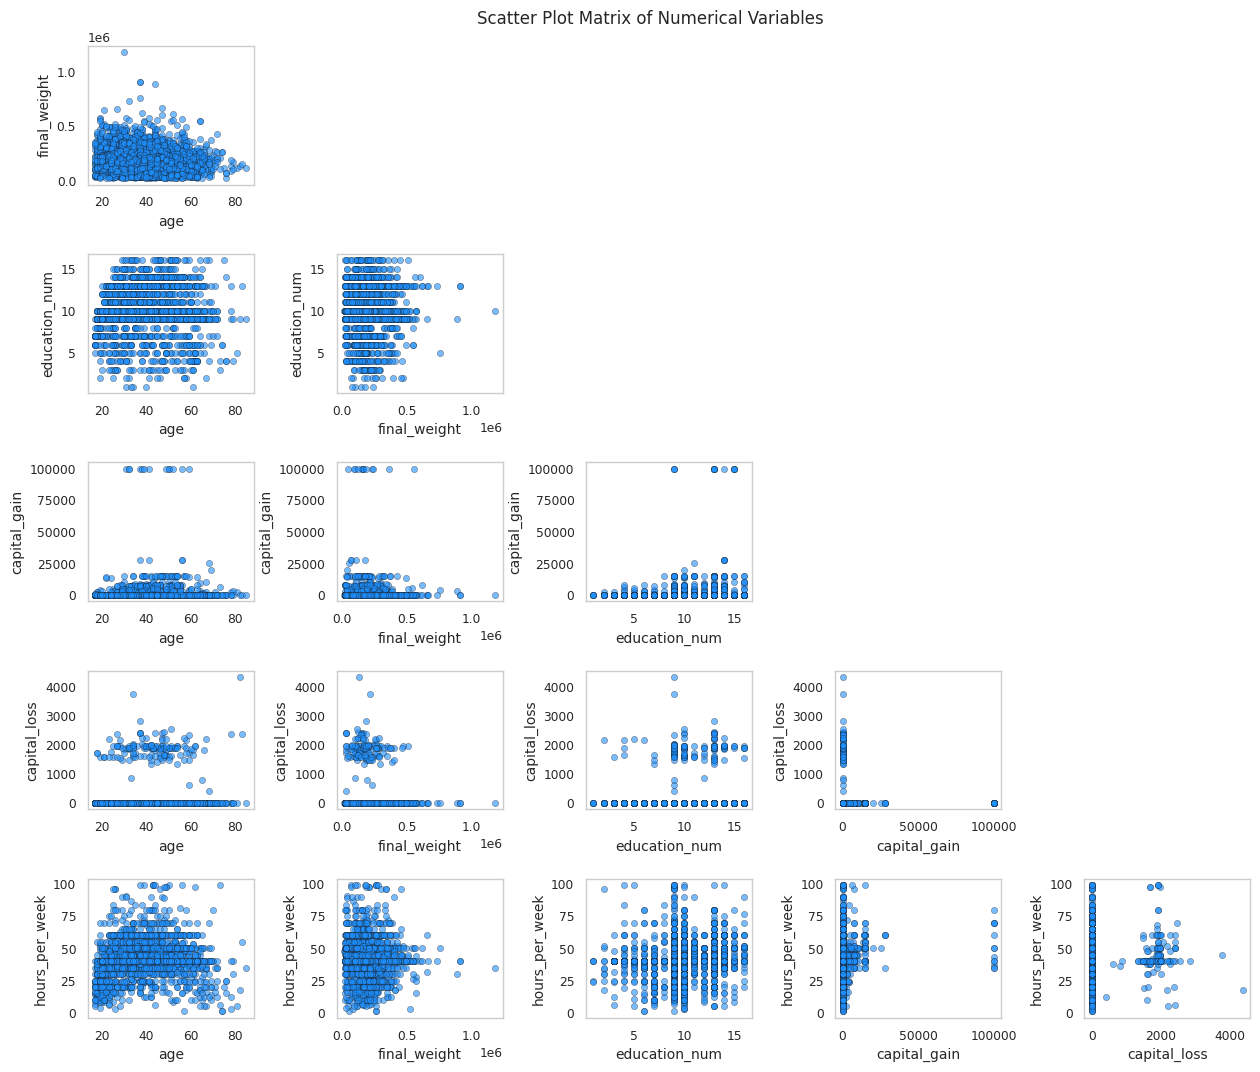

In [ ]:
sampled_num_df = num_df.sample(frac=0.1, replace=True, random_state=1)
sampled_num_df.reset_index(drop=True, inplace=True)
num_var = ["age", "final_weight", "education_num", "capital_gain", "capital_loss", "hours_per_week"]

sns.set(style="whitegrid", context="paper")
fig, axes = plt.subplots(nrows=len(num_var) - 1, ncols=len(num_var) - 1, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5, top=0.92)

for i in range(len(num_var) - 1):
    for j in range(i + 1, len(num_var)):
        ax = axes[j - 1, i]
        sns.scatterplot(data=sampled_num_df, x=num_var[i], y=num_var[j], ax=ax, color="dodgerblue", alpha=0.6, s=20, edgecolor="k")
        ax.set_xlabel(num_var[i], fontsize=10)
        ax.set_ylabel(num_var[j], fontsize=10)
        ax.grid(False)

for i in range(1, len(num_var) - 1):
    for j in range(i):
        fig.delaxes(axes[j, i])

fig.suptitle("Scatter Plot Matrix of Numerical Variables", fontsize=12, y=0.95)
plt.show()

 Let's look into the distribution of income class among the numric variables.  We will begin that by removing leading and trailing whitespaces around the class levels.

In [ ]:
modified_df.loc[:, "income_class"] = modified_df["income_class"].str.strip()

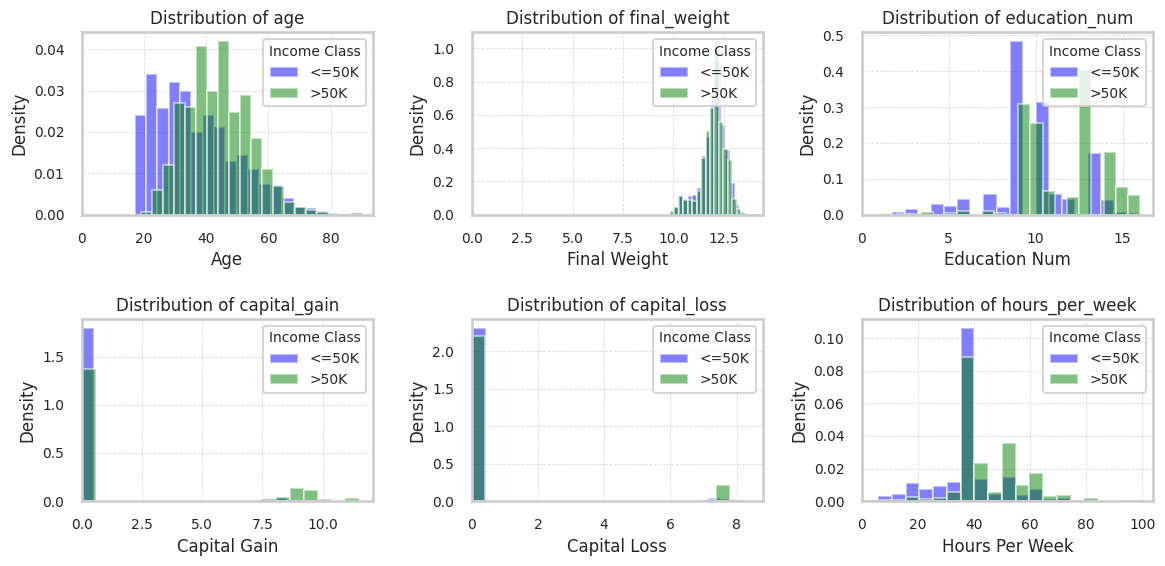

In [ ]:
target_var = 'income_class'

sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

# Loop through each numeric column and generate histograms
for i, colname in enumerate(num_var):
    low_income = modified_df.loc[modified_df[target_var] == '<=50K', colname]
    high_income = modified_df.loc[modified_df[target_var] == '>50K', colname]

    # Apply logarithmic scale to skewed data
    if colname in ['capital_gain', 'capital_loss', 'final_weight']:
        low_income = np.log1p(low_income)  # log1p is log(1 + x) to handle zeros
        high_income = np.log1p(high_income)

 # Create the histogram plot on the respective subplot
    axes[i].hist(low_income, label='<=50K', bins=20, density=True, alpha=0.5, color='blue')
    axes[i].hist(high_income, label='>50K', bins=20, density=True, alpha=0.5, color='green')

    # Customize plot appearance
    axes[i].set_title(f'Distribution of {colname}', fontsize=12)
    axes[i].set_xlabel(colname.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)
    # Adjust the legend size and placement
    axes[i].legend(title='Income Class', prop={'size': 10}, title_fontsize=10, loc='upper right')

    # Set x-axis limits to start at 0 and go to the maximum value
    xmin, xmax = axes[i].get_xlim()
    axes[i].set_xlim(0, xmax)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Reduce grid line visibility
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

 We will also look into the distribution of income class among the categorical variables.


In [ ]:
# Select categorical variables from the dataset
cat_var = modified_df.select_dtypes(include=["object", "category"]).columns.to_list()
# Remove the target and native_country from the list of categorical variables.
#The native_country variable has many categories, and plotting them in a subplot will cause overcrowding, making the categories difficult to see.
remove_list = ["income_class", "native_country"]
cat_var = [i for i in cat_var if i not in remove_list]

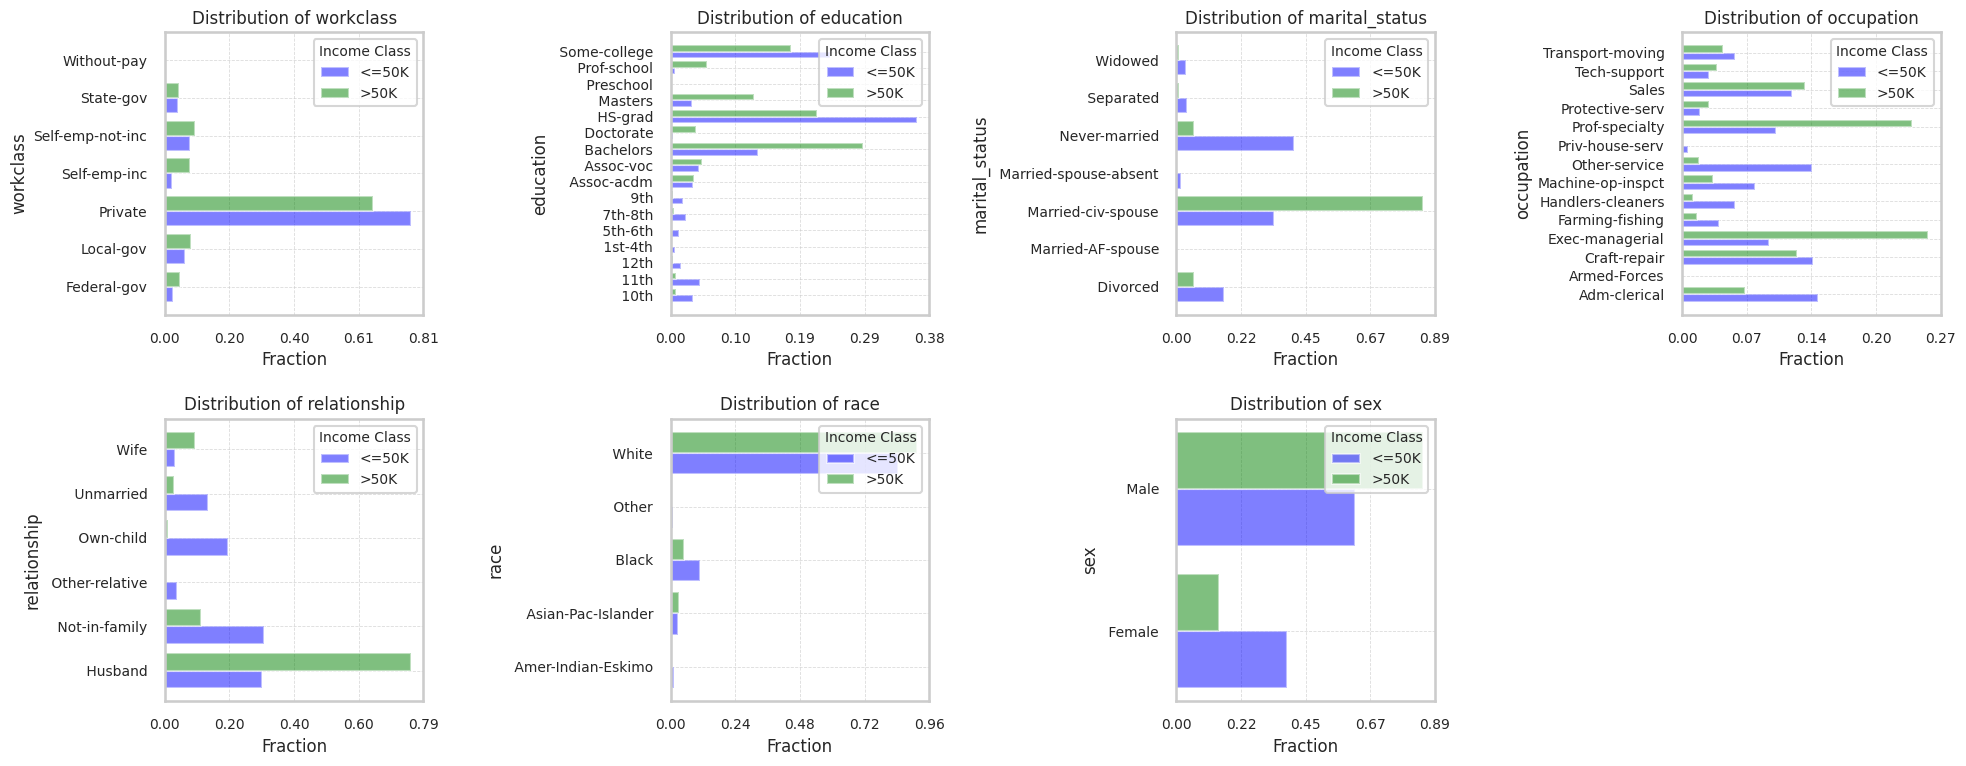

In [ ]:
sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axes = axes.flatten()

# Loop through each categorical column and generate bar plots
for i, colname in enumerate(cat_var):
    low_income = modified_df.loc[modified_df[target_var] == '<=50K', colname]
    high_income = modified_df.loc[modified_df[target_var] == '>50K', colname]

    # Calculate value counts for each category
    low_income_stats = low_income.value_counts(normalize=True)
    high_income_stats = high_income.value_counts(normalize=True)

    # Align the categories between low and high income
    all_cat = sorted(set(low_income_stats.index).union(set(high_income_stats.index)))

    low_income_stats = low_income_stats.reindex(all_cat, fill_value=0)
    high_income_stats = high_income_stats.reindex(all_cat, fill_value=0)

    # Adjust bar positions to avoid overlap
    bar_width = 0.4
    r1 = np.arange(len(all_cat))
    r2 = [x + bar_width for x in r1]

    # Create the bar plot on subplot
    axes[i].barh(r1, low_income_stats, height=bar_width, alpha=0.5, color='blue', label='<=50K')
    axes[i].barh(r2, high_income_stats, height=bar_width, alpha=0.5, color='green', label='>50K')

    # Customize plot appearance
    axes[i].set_title(f'Distribution of {colname}', fontsize=12)
    axes[i].set_xlabel('Fraction', fontsize=12)
    axes[i].set_ylabel(f'{colname}', fontsize=12)
    axes[i].set_yticks([r + bar_width / 2 for r in range(len(all_cat))])
    axes[i].set_yticklabels(all_cat, fontsize=10)

    # Adjust the legend size and placement
    axes[i].legend(title='Income Class', prop={'size': 10}, title_fontsize=10, loc='upper right')

    # Set x-axis ticks to generate 5 evenly spaced ticks
    x_ticks = np.linspace(0, axes[i].get_xlim()[1], 5)
    axes[i].set_xticks(x_ticks)
    axes[i].set_xticklabels([f'{tick:.2f}' for tick in x_ticks], fontsize=10)

    # Reduce grid line visibility
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.7)

#We have seven variables and have to set row number to two and column numer to 4.
#Remove the last empty subplot since there are fewer variables than subplots
if len(cat_var) < len(axes):
    fig.delaxes(axes[-1])

fig.subplots_adjust(hspace=0.25, wspace=0.25)
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

1. Split the data into training and test sets. Remember not to include the label you're trying to predict, `income`, as a column in your training data.

In [ ]:
# Split the dataset into training and testing set
target_var = modified_df.columns[- 1]
X, y = modified_df.drop(target_var, axis=1), modified_df[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Convert target labesl to numeric values
y_train = y_train.map({"<=50K":0, ">50K": 1})
y_test = y_test.map({"<=50K":0, ">50K": 1})

In [ ]:
#Display the dimensions of the training and test sets. X and y represent the input matrix and target vector, respectively. X is a two-dimensional array, while y is a one-dimensional array.
print("X_train.shape :", X_train.shape)
print("X_test.shape :", X_test.shape)
print("y_train.shape :", y_train.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (21097, 14)
X_test.shape : (9042, 14)
y_train.shape : (21097,)
y_test.shape : (9042,)


In machine learning, the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) metric are commonly used to evaluate the performance of binary classification models. These are valuable tools for understanding how well a model can distinguish between the positive and negative classes in a classification problem.

Let's break down each concept:

1. ROC Curve:
The ROC curve is a graphical representation of a binary classifier's performance as the discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at different threshold values. Here's how these rates are calculated:

- True Positive Rate (TPR), also called Sensitivity or Recall, measures the proportion of actual positive instances that are correctly identified by the model:
   TPR = True Positives / (True Positives + False Negatives)

- False Positive Rate (FPR) measures the proportion of actual negative instances that are incorrectly classified as positive by the model:
   FPR = False Positives / (False Positives + True Negatives)

The ROC curve is useful because it shows how well a classifier can trade off between sensitivity and specificity across different threshold values. The ideal ROC curve hugs the top-left corner, indicating a high TPR and low FPR, meaning the classifier is excellent at distinguishing between the two classes.

2. AUC (Area Under the Curve):
The AUC is a scalar metric derived from the ROC curve. It represents the area under the ROC curve, hence its name. The AUC ranges from 0 to 1, where 0 indicates a very poor classifier (always predicting the opposite class) and 1 signifies a perfect classifier (making all correct predictions).

The AUC metric is beneficial because it provides a single value to summarize the classifier's overall performance across all possible threshold values. It is particularly useful when dealing with imbalanced datasets, where one class significantly outnumbers the other. In such cases, accuracy alone might not be a reliable evaluation metric, and AUC can provide a more robust performance measure.

A quick rule of thumb for interpreting AUC values:
- AUC ≈ 0.5: The model performs no better than random guessing.
- 0.5 < AUC < 0.7: The model has poor to fair performance.
- 0.7 < AUC < 0.9: The model has good to excellent performance.
- AUC ≈ 1: The model is close to or has a perfect performance.

Here are your tasks:

  1. Use Scikit-Learn's [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to calculate the AUC score for a method that always predicts the majority class.  

In [ ]:
majority_class = y_test.value_counts().idxmax()

if majority_class == 1:
    y_pred_proba = np.ones(len(y_test))  # Predict 1 (100% probability of class 1)
else:
    y_pred_proba = np.zeros(len(y_test))  # Predict 0 (0% probability of class 1)

auc_score = roc_auc_score(y_test, y_pred_proba) # Calculate the AUC score
print(f"AUC Score for majority class prediction: {auc_score:.2f}")

AUC Score for majority class prediction: 0.50


Now, let's do a little feature engineering.

1. Use Scikit-Learn's [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) to apply One Hot Encoding to the categorical variables in `workclass`, `education`, `marital-status`, `occupation`, `relationship`, 'race', `sex`, and `native-country`. Also, apply [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to the remaining continuous features. How many columns will the dataframe have after these columns transformations are applied?

In [ ]:
#Select numeric features
cat_variable = ["workclass","education","marital_status","occupation","relationship",
                "race","sex","native_country"]
#Select numeric and categorical features
num_var = ["age", "final_weight", "education_num", "capital_gain", "capital_loss",
           "hours_per_week"]

#ColumnTransformer to apply MinMaxScaler to numeric features
num_transformer = Pipeline(
    steps=[("MinMaxScale", MinMaxScaler())]
)
#ColumnTransformer to apply One Hot Encoding to the categorical features
cat_transformer = Pipeline(
    steps=[("encoder", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))]
)
# Define the preprocessor
preproc = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_var),
        ("cat", cat_transformer, cat_variable),
    ]
)

# Convert the numpy array back to a DataFrame
preproc.set_output(transform='pandas')
X_train = preproc.fit_transform(X_train)
X_test = preproc.transform(X_test)

In [ ]:
# How many columns will the dataframe have after these columns transformations are applied?
n_col = X_train.shape[1]
print(f"The transformed dataframe has {n_col} columns")

The transformed dataframe has 103 columns


Keras is an open-source deep learning library written in Python. It was developed to provide a user-friendly, high-level interface for building and training neural networks. The library was created by François Chollet and was first released in March 2015 as part of the Deeplearning4j project. Later, it became part of the TensorFlow ecosystem and is now the official high-level API for TensorFlow.

Keras is designed to be modular, user-friendly, and easy to extend. It allows researchers and developers to quickly prototype and experiment with various deep learning models. One of the primary goals of Keras is to enable fast experimentation, making it simple to build and iterate on different architectures.

Key features of Keras include:

1. User-friendly API: Keras provides a simple and intuitive interface for defining and training deep learning models. Its design philosophy focuses on ease of use and clarity of code.

2. Modularity: Models in Keras are built as a sequence of layers, and users can easily stack, merge, or create complex architectures using a wide range of predefined layers.

3. Extensibility: Keras allows users to define custom layers, loss functions, and metrics. This flexibility enables researchers to experiment with new ideas and algorithms seamlessly.

4. Backends: Initially, Keras supported multiple backends, including TensorFlow, Theano, and CNTK. However, as of TensorFlow version 2.0, TensorFlow has become the primary backend for Keras.

5. Multi-GPU and distributed training: Keras supports training models on multiple GPUs and in distributed computing environments, making it suitable for large-scale experiments.

6. Pre-trained models: Keras includes a collection of pre-trained models for common tasks, such as image classification (e.g., VGG, ResNet, MobileNet) and natural language processing (e.g., Word2Vec, GloVe).

The integration of Keras into TensorFlow as its official high-level API has solidified its position as one of the most popular deep learning libraries in the machine learning community. Its ease of use and versatility have contributed to its widespread adoption in both academia and industry for a wide range of deep learning tasks.

Here are your tasks:

1. Create your own model in Keras to predict income in the Adult training data. Remember, it's always better to start simple and add complexity to the model if necessary. What's a good loss function to use?

2. Keras can be integrated with Scitkit-Learn using a wrapper. Use the [KerasClassifier wrapper](https://adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html) to integrate your Keras model with the ColumnTransformer from previous steps using a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) object.

3. Fit your model.

4. Calculate the AUC score of your model on the test data. Does the model predict better than random?

5. Generate an ROC curve for your model using [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html). What would the curve look like if all your predictions were randomly generated? What would the curve look like if it you had a perfect model?

In [ ]:
# Define the Keras model
def create_model(input_dim, optimizer="adam", activation="relu"):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation=activation))  # Input layer with 64 units
    model.add(Dense(32, activation=activation))  # Hidden layer with 32 units
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(1, activation="sigmoid"))  # Output layer with sigmoid activation
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC']) # Compile the model
    return model

In [ ]:
# Create a Keras classifier
input_dim = X_train.shape[1]
model = KerasClassifier(build_fn=create_model, input_dim=input_dim, epochs=50, batch_size=32, verbose=0)

In [ ]:
# Create the scikit-learn pipeline
pipeline = Pipeline([("model", model)])

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Pipeline(steps=[('model',
                 KerasClassifier(batch_size=32, build_fn=<function create_model at 0x7da1376b6320>, epochs=50, input_dim=103, verbose=0))])

In [ ]:
# Make predictions on the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.2f}")

# Check if the model predicts better than random (AUC > 0.5)
if auc_score > 0.5:
    print("The model predicts better than random.")
else:
    print("The model does not predict better than random.")

AUC Score: 0.90
The model predicts better than random.


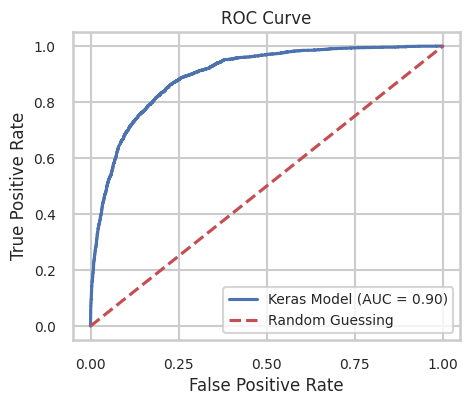

In [ ]:
# Generate an ROC curve for your model.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f'Keras Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=12)
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.legend(prop={'size': 10}, fontsize=12)
plt.show()